# PCA
 * PCA는 데이터의 분산(variance)을 최대로 하는 축을 찾는 것을 반복하여, 고차원 공간의 표본들을 저차
원 공간으로 변환하는 기법

 * 분산이 크다 = 다차원의 데이터를 저차원의 데이터에 담을 수 있다.
 
 ### PCA 절차
 1. 각 feature들을 '표준화' 해준다. (평균이 0, 표준편차 1)(?)
 2. 가장 feature들을 잘 설명해주는 '선'을 찾는다.
 3. 좌표를 변환한다. 
 
 ### 공분산 행렬
  * 공분산의 의미 = 각 feature의 변화량(변동)이 얼마나 닮아 있는가? 
 표준화된 데이터 matrix * T(표준화된 데이터 matrix) = 공분산
 수학적으로, 공분산 행렬은 선형 변환(shearing)를 의미한다. 
 
 ### 고유값(아이젠 벡터, Eigen Vector)
 n개의 feature에서는 n개의 아이젠 벡터가 나온다.
 k개의 아이젠 벡터를 선택하면, k개의 주성분이 나타난다.
 
 ### 고유값, 고유벡터의 의미
 A = 정방행렬
 람다 = 고유값 = 상수항
 아이젠 벡터 = 고유벡터 = 변화한 벡터 
 크기는 변하지만, **방향은 유지되는** 벡터(eigenvector)가 존재하는가? 
 또한, 아이젠 벡터끼리는 반드시 직교(90) 한다. 

## 2.1 차원 축소의 예
 변수의 개수를 차원이라고 생각할 수 있다.

In [1]:
국어 = 80
영어 = 60
수학 = 90
과학 = 70

평균 = (국어 + 영어 + 수학 + 과학) / 4 # 5개 차원을 1개 차원으로 축소

평균

75.0

In [2]:
몸무게 = 70
키 = 180

BMI = 몸무게 / (키*키) # 2개 차원을 1개 차원으로 축소

BMI

0.0021604938271604936

## 2.2 PCA 예제 1 

In [3]:
import pandas as pd
# Eating, exercise habbit and their body shape

df = pd.DataFrame(columns=['calory', 'breakfast','lunch','dinner','exercise','body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


### 2) vector 추출

In [4]:
# X is feature vectors
X = df[['calory','breakfast','lunch','dinner','exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [5]:
# Y is labels
Y = df[['body_shape']]
Y.head()

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


### 3) feature vector 표준화

In [6]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X) # 표준화 값 구하기

x_std

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [8]:
StandardScaler?
"""
Standardize features by removing the mean and scaling to unit variance
The standard score of a sample `x` is calculated as:
    z = (x - u) / s
"""

'\nStandardize features by removing the mean and scaling to unit variance\nThe standard score of a sample `x` is calculated as:\n    z = (x - u) / s\n'

In [10]:
print(x_std.mean()) # 사실상 0
print(x_std.std()) # 표준편차는 1
# 표준화 완료 

3.552713678800501e-17
1.0


### 4) feature 간 공분산 행렬 계산

In [11]:
import numpy as np

# features are columns from x_std
# 왜 1이 아니라 1.111...이 나오는 것인가요?
features = x_std.T
covariance_matrix = np.cov(features) # 상관관계 바로 구하는 행렬 
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [19]:
np.cov?

### 5) 고유 벡터(Eigen Vectors)와 고유값(Eigen Values) 산출

In [23]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvalues \n%s' %eig_vals) # 람다 값
print('Eigenvectors \n%s' %eig_vecs) # 아이젠 벡터 값

# 데이터 * 아이젠벡터(고유 벡터) = 고유 값 * 아이젠 벡터(고유 벡터)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [24]:
# 1개 차원으로 축소했을때 73%의 정보를 보유
eig_vals[0] / sum(eig_vals)

0.7318321731427544

### 6) 고유벡터(Eigen Vector)를 기준으로 데이터를 투영

In [20]:
df.dot?

In [14]:
# 표준화된 x_std 의 값과 아이젠 벡터를 곱해줌 (아이젠 벡터가 지금 행벡터 이기 때문에, T를 이용하여 열벡터로 변환)
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [15]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head()

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat


Text(0.5, 1.0, 'PCA result')

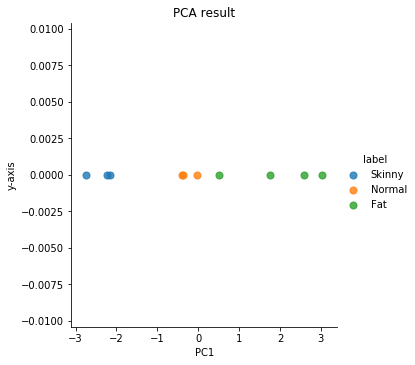

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1','y-axis', data=result, fit_reg=False, # x-axis, y-axis, data, no line
           scatter_kws = {"s": 50}, # marker size
           hue = 'label') # color

# title
plt.title('PCA result')

### 2.3 scikit-learn 활용 PCA

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

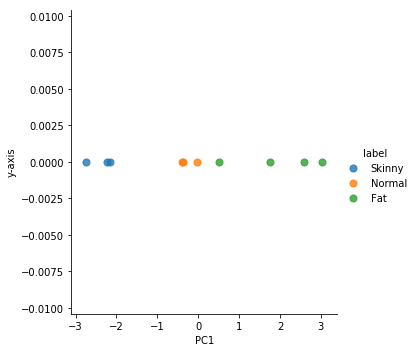

In [22]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, # x-axis, y-axis, data, no line
scatter_kws={"s": 50}, # marker size
hue="label") # color